In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv("dataset.csv")

# Display basic info
df.info()

# Preview data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number                1287 non-null   int64  
 1   id                    1287 non-null   int64  
 2   imdb_id               1287 non-null   object 
 3   popularity            1287 non-null   float64
 4   budget                1287 non-null   int64  
 5   revenue               1287 non-null   int64  
 6   original_title        1287 non-null   object 
 7   cast                  1287 non-null   object 
 8   homepage              1287 non-null   object 
 9   director              1287 non-null   object 
 10  tagline               1287 non-null   object 
 11  keywords              1287 non-null   object 
 12  overview              1287 non-null   object 
 13  runtime               1287 non-null   int64  
 14  genres                1287 non-null   object 
 15  production_companies 

,number,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level
0,0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,09-06-2015,5562,6.5,2015,137999939.3,1.392446e+09,1363528810,High
1,1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,13-05-2015,6185,7.1,2015,137999939.3,3.481613e+08,228436354,High
2,2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,18-03-2015,2480,6.3,2015,101199955.5,2.716190e+08,185238201,High
3,3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,15-12-2015,5292,7.5,2015,183999919.0,1.902723e+09,1868178225,High
4,4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,01-04-2015,2947,7.3,2015,174799923.1,1.385749e+09,1316249360,High


In [10]:
# Select relevant columns
df = df[['original_title', 'genres', 'overview', 'vote_average', 'popularity']]

# Drop rows with missing values in important columns
df.dropna(subset=['original_title', 'genres', 'overview'], inplace=True)


<ipython-input-10-fc4713295e71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['original_title', 'genres', 'overview'], inplace=True)


In [11]:
# Check data types
df.dtypes

# Convert text columns to string and ensure numeric columns are floats
df['original_title'] = df['original_title'].astype(str)
df['genres'] = df['genres'].astype(str)
df['overview'] = df['overview'].astype(str)
df['vote_average'] = df['vote_average'].astype(float)
df['popularity'] = df['popularity'].astype(float)

In [12]:
# Check for duplicates
duplicates = df.duplicated(subset='original_title').sum()
print(f"Duplicate movie titles: {duplicates}")

# Drop duplicate titles, keeping the first occurrence
df.drop_duplicates(subset='original_title', keep='first', inplace=True)


Duplicate movie titles: 7


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['vote_average', 'popularity']] = scaler.fit_transform(df[['vote_average', 'popularity']])


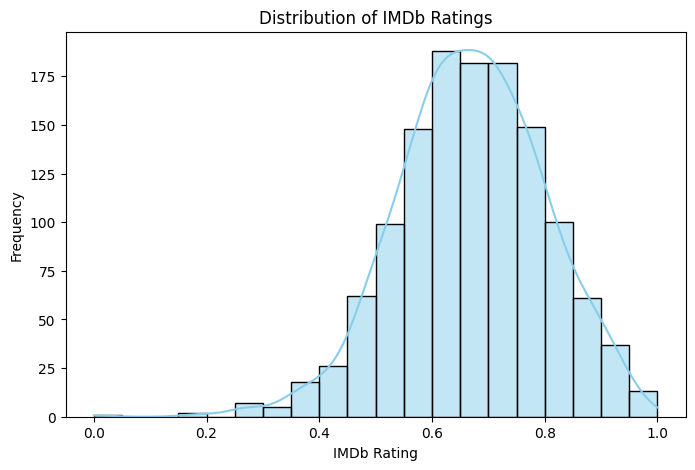

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['vote_average'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()


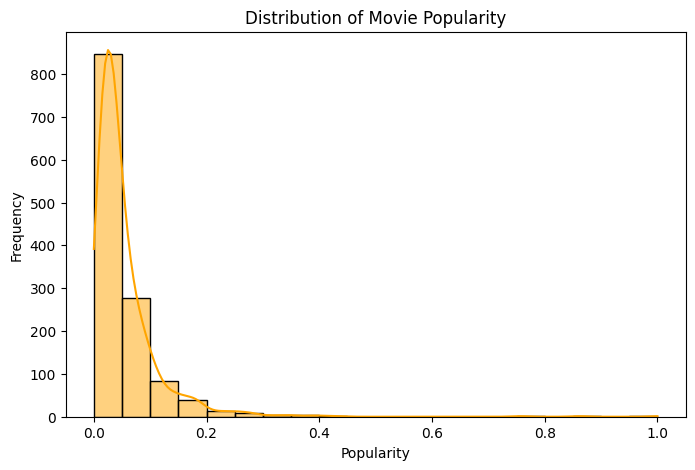

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], bins=20, kde=True, color='orange')
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


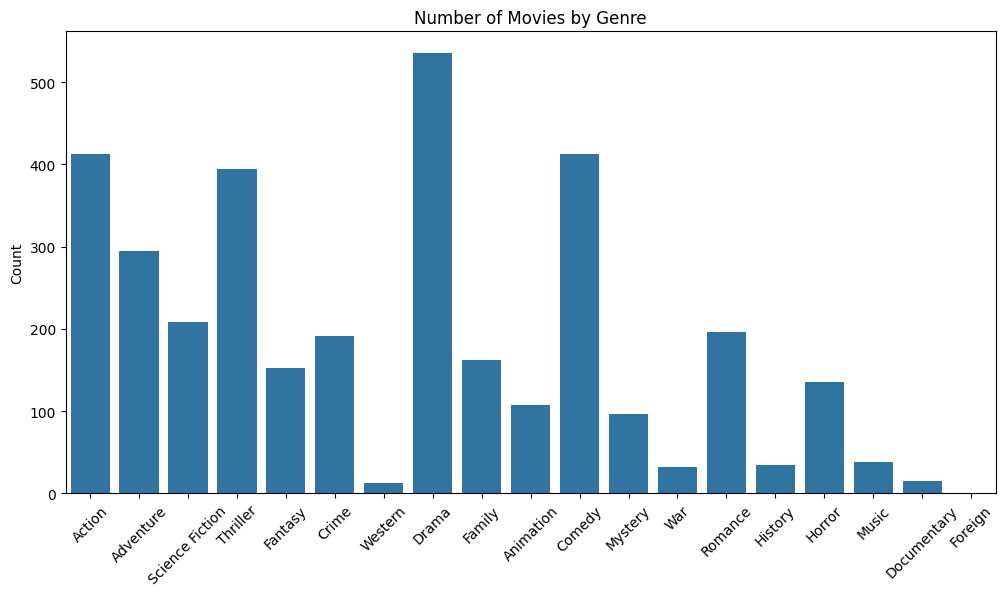

In [17]:
from collections import Counter

# Extract individual genres
genre_list = df['genres'].str.split('|').explode()
genre_counts = Counter(genre_list)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.title('Number of Movies by Genre')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


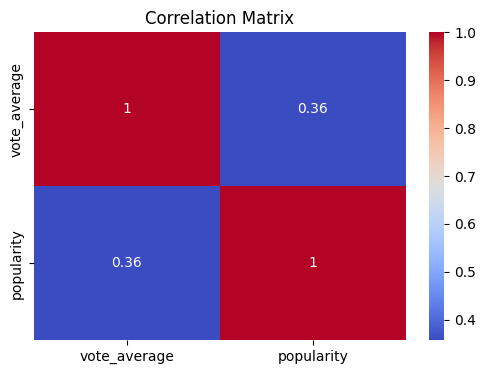

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['vote_average', 'popularity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


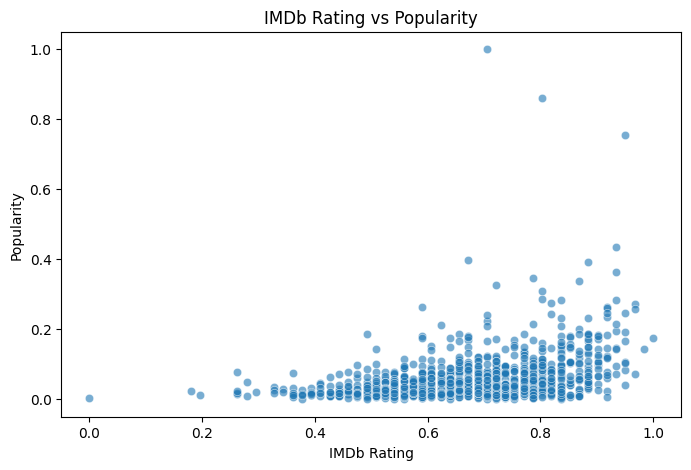

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='vote_average', y='popularity', alpha=0.6)
plt.title('IMDb Rating vs Popularity')
plt.xlabel('IMDb Rating')
plt.ylabel('Popularity')
plt.show()

<ipython-input-20-37dd0705d80c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_genre.index, y=avg_rating_per_genre.values, palette='viridis')


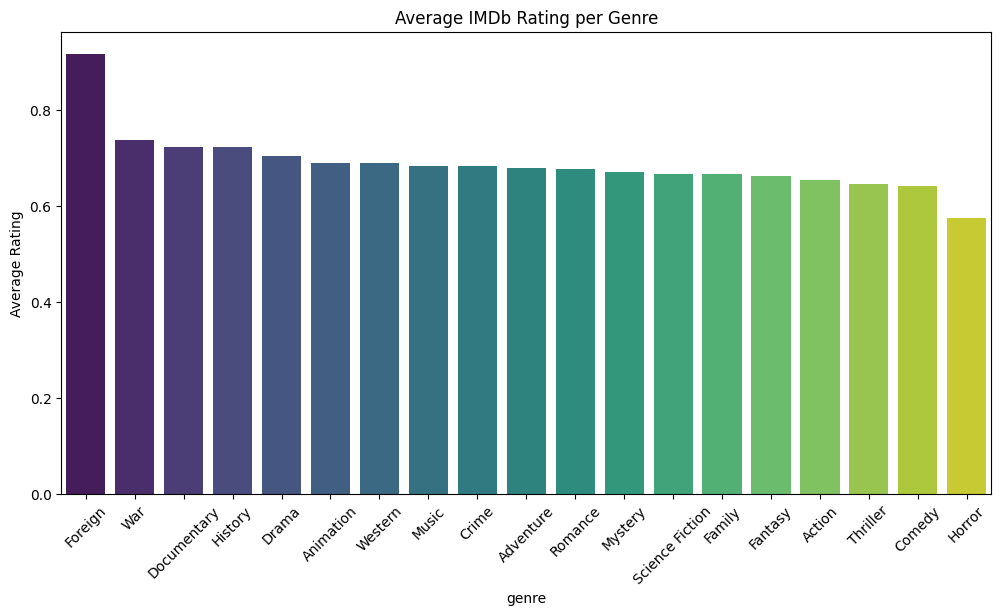

In [20]:
genre_rating = df.assign(genre=df['genres'].str.split('|')).explode('genre')
avg_rating_per_genre = genre_rating.groupby('genre')['vote_average'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_per_genre.index, y=avg_rating_per_genre.values, palette='viridis')
plt.title('Average IMDb Rating per Genre')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.show()


In [24]:
df['combined_text'] = df['genres'] + " " + df['overview']
df['combined_text'].head()

,combined_text
0,Action|Adventure|Science Fiction|Thriller Twen...
1,Action|Adventure|Science Fiction|Thriller An a...
2,Adventure|Science Fiction|Thriller Beatrice Pr...
3,Action|Adventure|Science Fiction|Fantasy Thirt...
4,Action|Crime|Thriller Deckard Shaw seeks reven...


In [26]:
df['genre_list'] = df['genres'].apply(lambda x: x.split('|'))
df['genre_list'].head()

,genre_list
0,"[Action, Adventure, Science Fiction, Thriller]"
1,"[Action, Adventure, Science Fiction, Thriller]"
2,"[Adventure, Science Fiction, Thriller]"
3,"[Action, Adventure, Science Fiction, Fantasy]"
4,"[Action, Crime, Thriller]"


In [30]:
# Binning IMDb rating
df['rating_level'] = pd.cut(df['vote_average'],
                            bins=[0, 5, 7, 10],
                            labels=['Low', 'Medium', 'High'])

# Binning popularity
df['popularity_level'] = pd.qcut(df['popularity'], q=4,
                                  labels=['Low', 'Medium', 'High', 'Very High'])

print(df['rating_level'].head(),df['popularity_level'].head())

0    Low
1    Low
2    Low
3    Low
4    Low
Name: rating_level, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High'] 0    Very High
1    Very High
2    Very High
3    Very High
4    Very High
Name: popularity_level, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']


In [32]:
# ==========================
# MOVIE RATING PREDICTION APP
# ==========================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score

# -----------------------------
# STEP 1: Load and preprocess data
# -----------------------------

# Load dataset (make sure your CSV file path is correct)
df = pd.read_csv("dataset.csv")

# Drop rows with missing values in required columns
df.dropna(subset=['genres', 'overview', 'vote_average', 'popularity'], inplace=True)

# Combine genres and overview for text feature
df['combined_text'] = df['genres'].astype(str) + " " + df['overview'].astype(str)

# Create a classification target: IMDb rating category
df['rating_category'] = pd.cut(df['vote_average'], bins=[0, 5, 7, 10],
                               labels=['Low', 'Medium', 'High'])

# -----------------------------
# STEP 2: Feature extraction using TF-IDF
# -----------------------------

tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X_text = tfidf.fit_transform(df['combined_text'])

# Compute average TF-IDF score for each movie
X_text_avg = X_text.mean(axis=1)
X_text_avg = np.array(X_text_avg).reshape(-1, 1)

# Combine TF-IDF average with numerical feature (popularity)
X = np.hstack((X_text_avg, df[['popularity']].values))

# -----------------------------
# STEP 3: Classification Models
# -----------------------------

print("\n=========== CLASSIFICATION MODELS ===========")

# Target: rating category
y_class = df['rating_category']

# Split into train/test
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, stratify=y_class, test_size=0.2, random_state=42)

# --- Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_c, y_train_c)
y_pred_log = log_reg.predict(X_test_c)

print("\n🔹 Logistic Regression Classification Report:")
print(classification_report(y_test_c, y_pred_log, zero_division=0))

# --- Model 2: Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_c, y_train_c)
y_pred_rf = rf_clf.predict(X_test_c)

print("\n🔹 Random Forest Classifier Report:")
print(classification_report(y_test_c, y_pred_rf, zero_division=0))

# -----------------------------
# STEP 4: Regression Models
# -----------------------------

print("\n=========== REGRESSION MODELS ===========")

# Target: continuous rating value
y_reg = df['vote_average']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# --- Model 3: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_r, y_train_r)
y_pred_lin = lin_reg.predict(X_test_r)

print("\n🔹 Linear Regression Results:")
print("RMSE:", round(np.sqrt(mean_squared_error(y_test_r, y_pred_lin)), 3))
print("R² Score:", round(r2_score(y_test_r, y_pred_lin), 3))

# --- Model 4: Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_r, y_train_r)
y_pred_rf_reg = rf_reg.predict(X_test_r)

print("\n🔹 Random Forest Regressor Results:")
print("RMSE:", round(np.sqrt(mean_squared_error(y_test_r, y_pred_rf_reg)), 3))
print("R² Score:", round(r2_score(y_test_r, y_pred_rf_reg), 3))



=========== CLASSIFICATION MODELS ===========

🔹 Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.56      0.12      0.19        43
         Low       0.00      0.00      0.00        14
      Medium       0.79      0.98      0.88       201

    accuracy                           0.78       258
   macro avg       0.45      0.37      0.36       258
weighted avg       0.71      0.78      0.71       258


🔹 Random Forest Classifier Report:
              precision    recall  f1-score   support

        High       0.47      0.19      0.27        43
         Low       0.00      0.00      0.00        14
      Medium       0.80      0.95      0.87       201

    accuracy                           0.77       258
   macro avg       0.42      0.38      0.38       258
weighted avg       0.70      0.77      0.72       258


=========== REGRESSION MODELS ===========

🔹 Linear Regression Results:
RMSE: 0.739
R² Score: 0.191

🔹 Rando

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


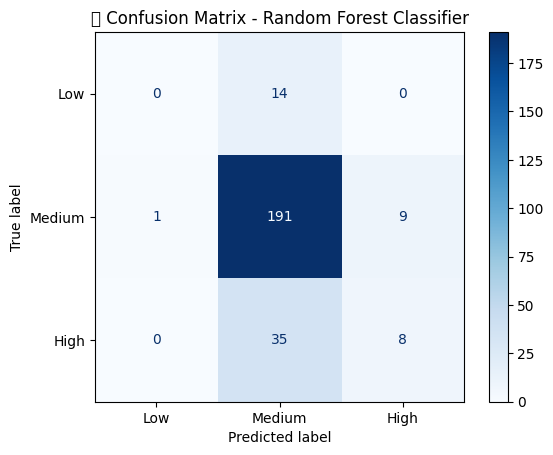

In [35]:
# Confusion matrix for Random Forest Classifier
cm = confusion_matrix(y_test_c, y_pred_rf, labels=['Low', 'Medium', 'High'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap='Blues')
plt.title("🎯 Confusion Matrix - Random Forest Classifier")
plt.show()


<ipython-input-36-b20bd43ee115>:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


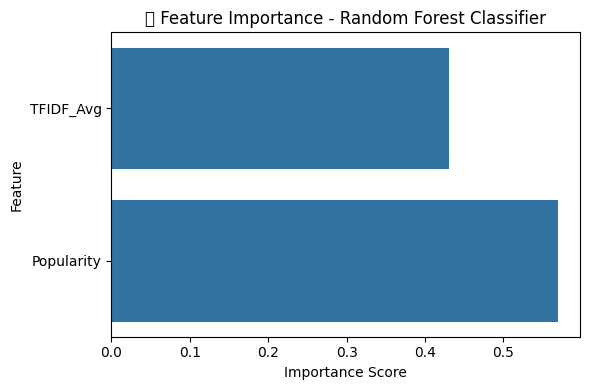

In [36]:
# Feature importance for Random Forest Classifier
features = ['TFIDF_Avg', 'Popularity']
importances = rf_clf.feature_importances_

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title("📊 Feature Importance - Random Forest Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


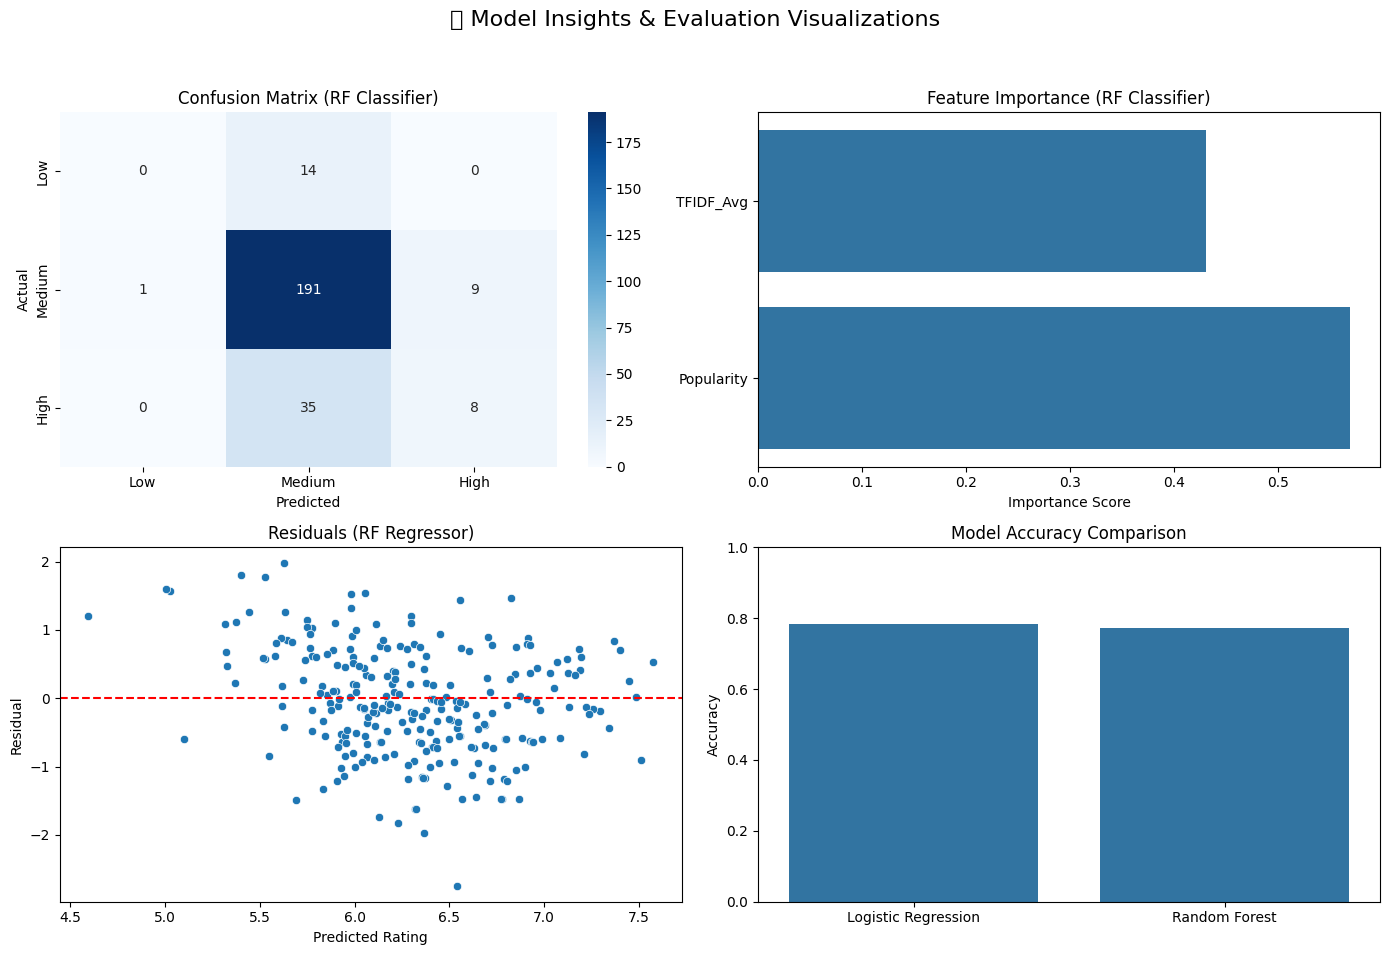

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# -----------------------------
# Load & Preprocess Data
# -----------------------------
df = pd.read_csv("dataset.csv")
df.dropna(subset=['genres', 'overview', 'vote_average', 'popularity'], inplace=True)
df['combined_text'] = df['genres'].astype(str) + " " + df['overview'].astype(str)
df['rating_category'] = pd.cut(df['vote_average'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

# -----------------------------
# Feature Extraction
# -----------------------------
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X_text = tfidf.fit_transform(df['combined_text'])
X_text_avg = X_text.mean(axis=1).A1.reshape(-1, 1)
X = np.hstack((X_text_avg, df[['popularity']].values))

# -----------------------------
# Classification Models
# -----------------------------
y_class = df['rating_category']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, stratify=y_class, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_c, y_train_c)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_c, y_train_c)
y_pred_rf = rf_clf.predict(X_test_c)

# -----------------------------
# Regression Models
# -----------------------------
y_reg = df['vote_average']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train_r, y_train_r)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_r, y_train_r)
y_pred_rf_reg = rf_reg.predict(X_test_r)
residuals = y_test_r - y_pred_rf_reg

# -----------------------------
# Visualization Grid Layout
# -----------------------------
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("🎬 Model Insights & Evaluation Visualizations", fontsize=16)

# --- 1. Confusion Matrix ---
cm = confusion_matrix(y_test_c, y_pred_rf, labels=['Low', 'Medium', 'High'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'], ax=axs[0, 0])
axs[0, 0].set_title("Confusion Matrix (RF Classifier)")
axs[0, 0].set_xlabel("Predicted")
axs[0, 0].set_ylabel("Actual")

# --- 2. Feature Importance ---
features = ['TFIDF_Avg', 'Popularity']
importances = rf_clf.feature_importances_
sns.barplot(x=importances, y=features, ax=axs[0, 1])
axs[0, 1].set_title("Feature Importance (RF Classifier)")
axs[0, 1].set_xlabel("Importance Score")

# --- 3. Residual Plot ---
sns.scatterplot(x=y_pred_rf_reg, y=residuals, ax=axs[1, 0])
axs[1, 0].axhline(0, color='red', linestyle='--')
axs[1, 0].set_title("Residuals (RF Regressor)")
axs[1, 0].set_xlabel("Predicted Rating")
axs[1, 0].set_ylabel("Residual")

# --- 4. Model Comparison (Classification Accuracy) ---
acc_log = log_reg.score(X_test_c, y_test_c)
acc_rf = rf_clf.score(X_test_c, y_test_c)
sns.barplot(x=['Logistic Regression', 'Random Forest'], y=[acc_log, acc_rf], ax=axs[1, 1])
axs[1, 1].set_title("Model Accuracy Comparison")
axs[1, 1].set_ylabel("Accuracy")
axs[1, 1].set_ylim(0, 1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


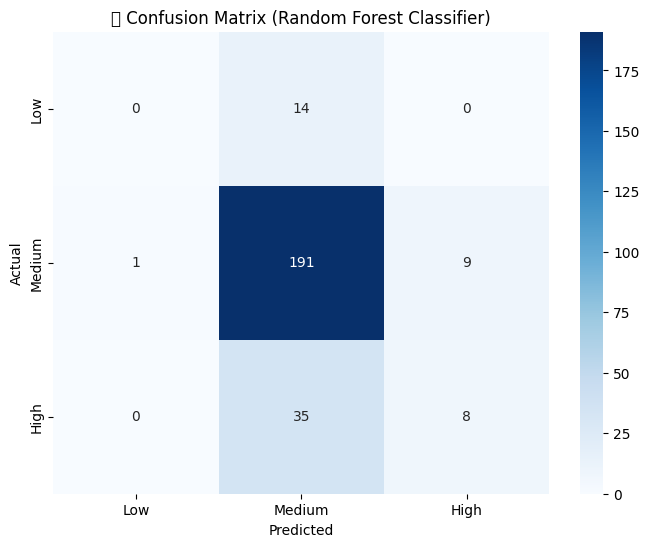

<ipython-input-39-6c5286bcd0bc>:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


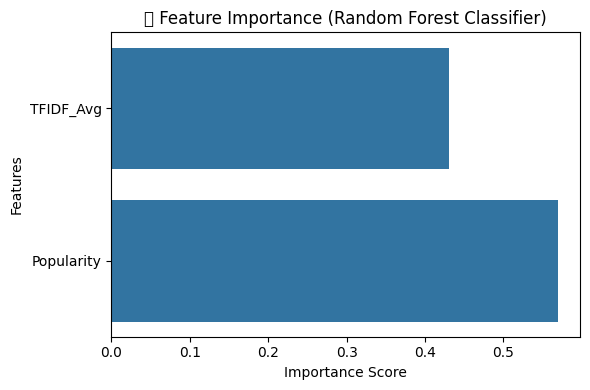

<ipython-input-39-6c5286bcd0bc>:84: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


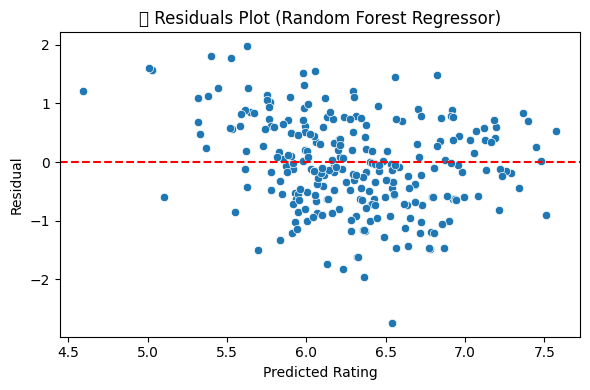

<ipython-input-39-6c5286bcd0bc>:95: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


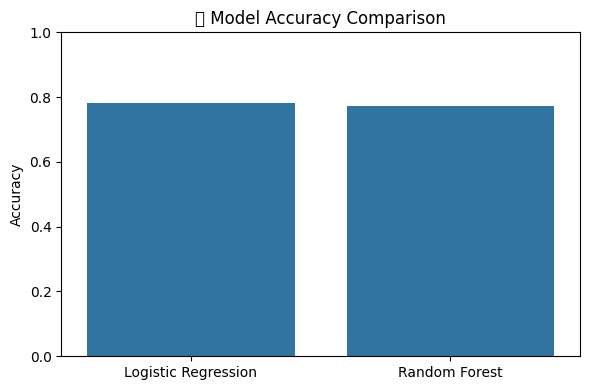

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# -----------------------------
# Load & Preprocess Data
# -----------------------------
df = pd.read_csv("dataset.csv")
df.dropna(subset=['genres', 'overview', 'vote_average', 'popularity'], inplace=True)
df['combined_text'] = df['genres'].astype(str) + " " + df['overview'].astype(str)
df['rating_category'] = pd.cut(df['vote_average'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

# -----------------------------
# Feature Extraction
# -----------------------------
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X_text = tfidf.fit_transform(df['combined_text'])
X_text_avg = X_text.mean(axis=1).A1.reshape(-1, 1)
X = np.hstack((X_text_avg, df[['popularity']].values))

# -----------------------------
# Classification Models
# -----------------------------
y_class = df['rating_category']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, stratify=y_class, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_c, y_train_c)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_c, y_train_c)
y_pred_rf = rf_clf.predict(X_test_c)

# -----------------------------
# Regression Models
# -----------------------------
y_reg = df['vote_average']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train_r, y_train_r)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_r, y_train_r)
y_pred_rf_reg = rf_reg.predict(X_test_r)
residuals = y_test_r - y_pred_rf_reg

# -----------------------------
# Visualization - Vertical Stack
# -----------------------------
plt.figure(figsize=(8, 6))
# --- 1. Confusion Matrix ---
cm = confusion_matrix(y_test_c, y_pred_rf, labels=['Low', 'Medium', 'High'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("🎯 Confusion Matrix (Random Forest Classifier)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- 2. Feature Importance ---
features = ['TFIDF_Avg', 'Popularity']
importances = rf_clf.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title("📊 Feature Importance (Random Forest Classifier)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# --- 3. Residual Plot (Random Forest Regressor) ---
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_rf_reg, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("📉 Residuals Plot (Random Forest Regressor)")
plt.xlabel("Predicted Rating")
plt.ylabel("Residual")
plt.tight_layout()
plt.show()

# --- 4. Model Accuracy Comparison (Classification Models) ---
acc_log = log_reg.score(X_test_c, y_test_c)
acc_rf = rf_clf.score(X_test_c, y_test_c)
plt.figure(figsize=(6, 4))
sns.barplot(x=['Logistic Regression', 'Random Forest'], y=[acc_log, acc_rf])
plt.title("✅ Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
